In [175]:
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [176]:
whale_returns_csv = Path("whale_returns.csv")

In [177]:
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format= True, parse_dates =True)

In [178]:
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [179]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [180]:
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [181]:
algo_returns_csv = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format= True, parse_dates =True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [182]:
algo_returns.isnull().sum()
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [183]:
sp500_history_csv = Path("sp500_history.csv")

In [184]:
sp500_history = pd.read_csv(sp500_history_csv, index_col = "Date", infer_datetime_format= True, parse_dates =True)

In [185]:
sp500_history.dtypes

Close    object
dtype: object

In [186]:
sp500_history["Close"] = sp500_history["Close"].str.replace("$","")

<ipython-input-186-67b433562865>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$","")


In [187]:
sp500_history

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [188]:
sp500_history["Close"] = sp500_history["Close"].str.replace(",","")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [189]:
sp500_returns = sp500_history.pct_change()

In [190]:
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [191]:
sp500_returns = sp500_returns.dropna()
sp500_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [192]:
sp500_returns = sp500_returns.rename(columns={"Close":"S&P 500"})

In [193]:
sp500_returns

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [194]:
# Combine Whale, Algorithmic, and S&P 500 Returns

In [195]:
all_portfolios =pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")

In [196]:
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [197]:
#Plot Daily Returns

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

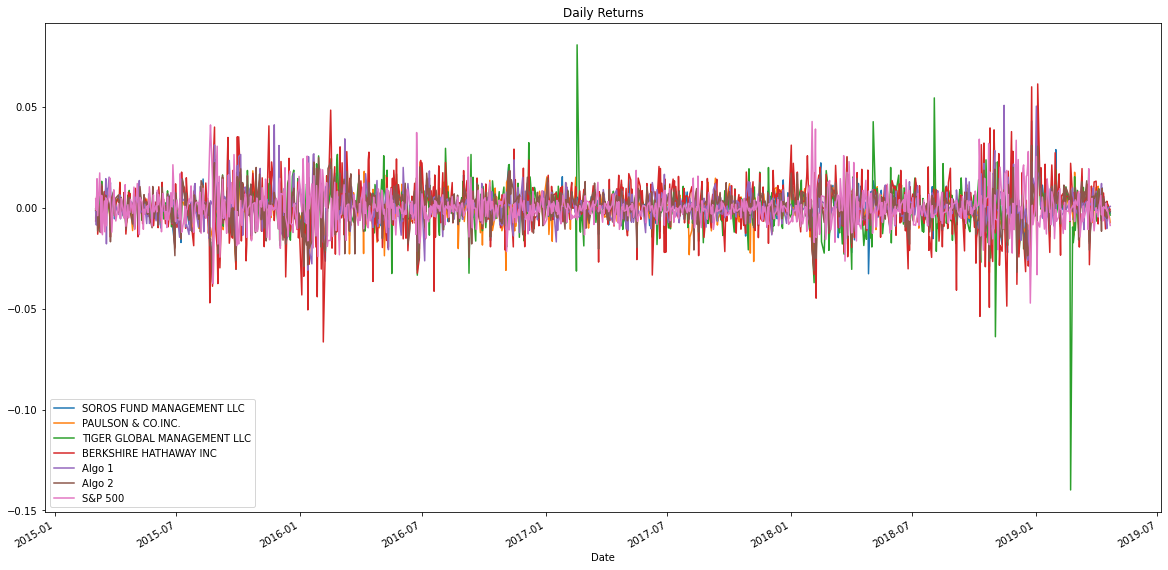

In [198]:
all_portfolios.plot(figsize=(20,10), title="Daily Returns")

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

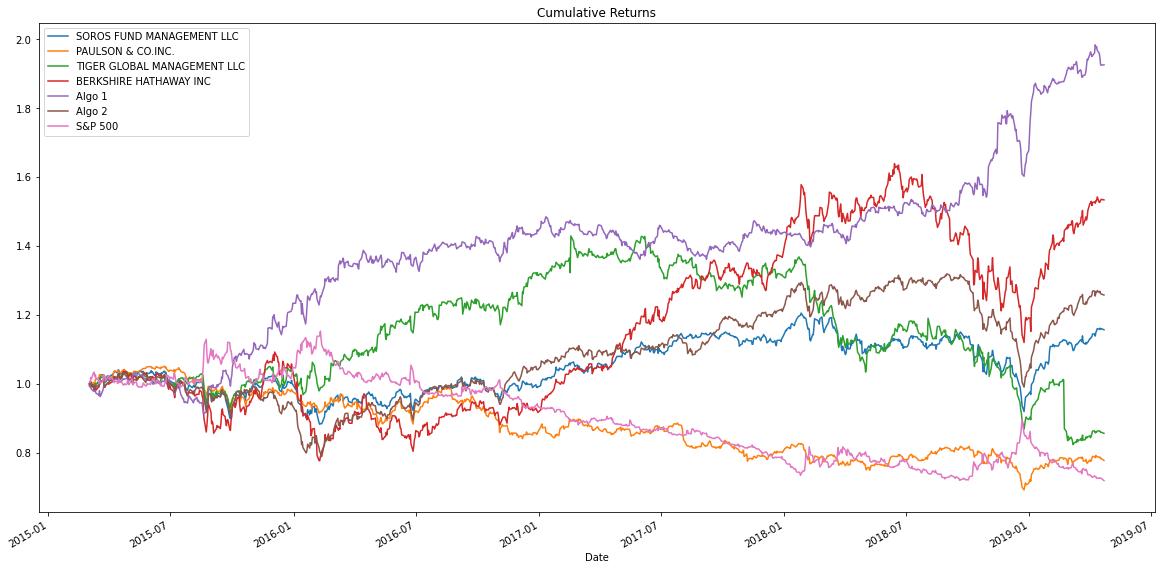

In [199]:
cumulative_returns = (1 + all_portfolios).cumprod()
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

In [200]:
# Box plot to visually show risk

<AxesSubplot:title={'center':'Portfolio Risk'}>

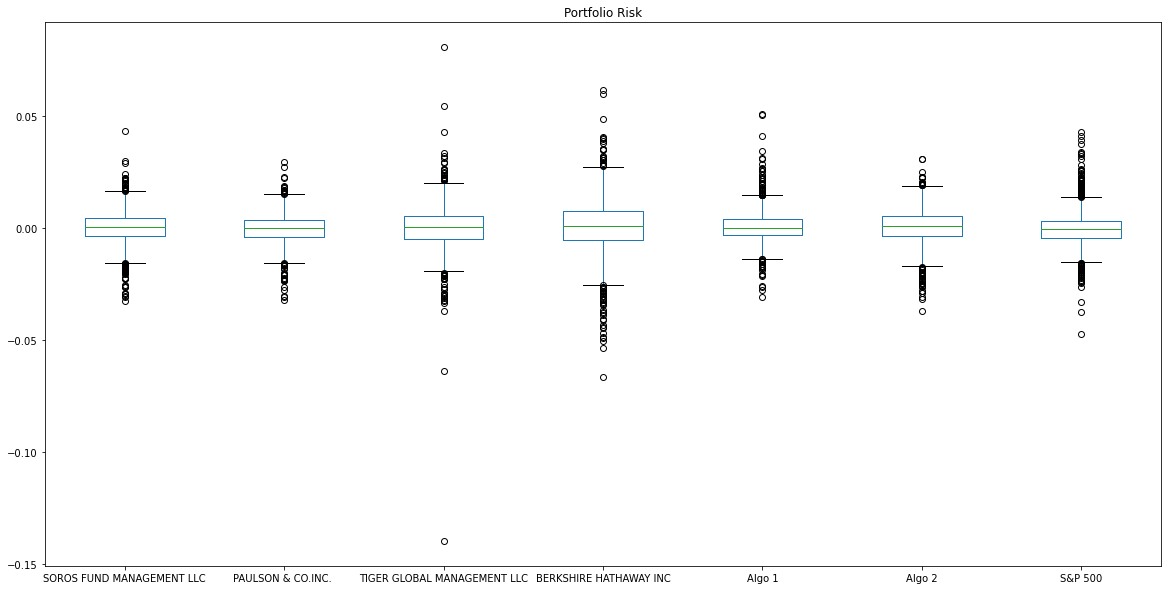

In [201]:
all_portfolios.plot.box(figsize=(20,10), title="Portfolio Risk")

In [202]:
# Calculate Standard Deviation

In [203]:
all_portfolios.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [204]:
# Calculate the daily standard deviations of S&P 500

In [205]:
sp500_risk = all_portfolios["S&P 500"].std

In [206]:
sp500_risk

<bound method NDFrame._add_numeric_operations.<locals>.std of Date
2015-03-03    0.004408
2015-03-04   -0.001195
2015-03-05    0.014378
2015-03-06   -0.003929
2015-03-09    0.017254
                ...   
2019-04-15   -0.000509
2019-04-16    0.002279
2019-04-17   -0.001577
2019-04-18   -0.001011
2019-04-22   -0.008764
Name: S&P 500, Length: 1042, dtype: float64>

In [207]:
# Calculate the annualized standard deviation (252 trading days)

In [208]:
import numpy as np

In [209]:
annual_std = all_portfolios.std() * np.sqrt(252)

In [210]:
#Calculate the rolling standard deviation for all portfolio

In [211]:
all_portfolios_roll_std = all_portfolios.rolling(window = 21).std()

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

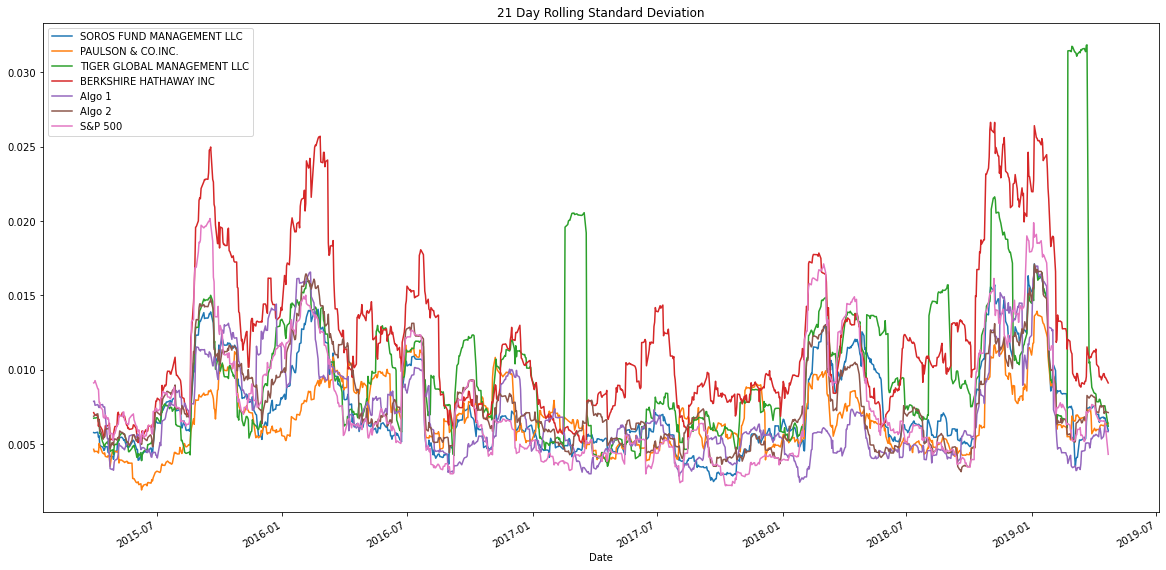

In [212]:
all_portfolios_roll_std.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [213]:
#Calculate the correlation

In [214]:
corr_df = all_portfolios.corr()

In [215]:
corr_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [216]:
#Calculate convariance of a single portfolio, variance of S&P 500, Compute beta, and plot beta trend

In [217]:
covariance = all_portfolios["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_portfolios)["S&P 500"]

In [218]:
variance = all_portfolios["S&P 500"].rolling(60).var()

In [219]:
beta = covariance / variance

<AxesSubplot:title={'center':'Berkshire Hathaway Inc. Beta'}, xlabel='Date'>

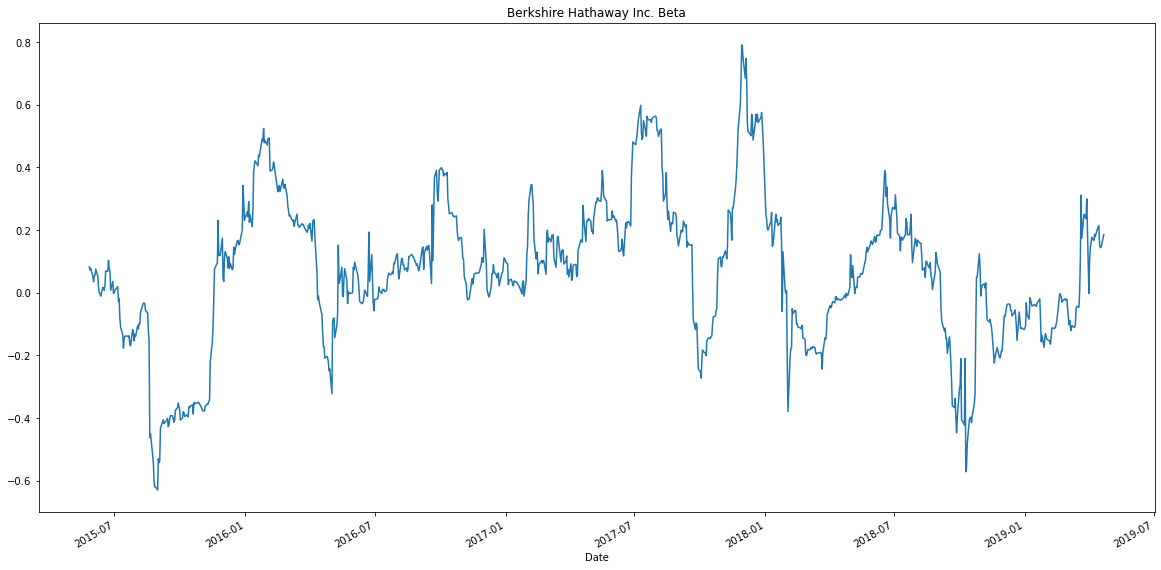

In [220]:
beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")

In [221]:
# Sharpe Ratios

In [222]:
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))

In [223]:
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

In [224]:
# Visualize the sharpe ratios as a bar plot

<AxesSubplot:title={'center':'Sharpe Ratios'}>

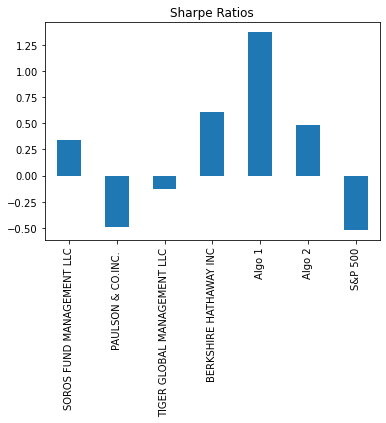

In [225]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [226]:
# Reading data from 3rd stock

In [296]:
slv_historicals_csv = Path("slv_historicals.csv")

In [297]:
slv_historicals_csv = pd.read_csv(
    slv_historicals_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [298]:
slv_historicals_csv = slv_historicals_csv.rename(columns={"Close": "Silver"})

In [299]:
slv_historicals_csv = slv_historicals_csv.sort_index()

In [300]:
slv_historicals_csv.head()

,Silver
Date,
2019-02-12,14.73
2019-02-13,14.59
2019-02-14,14.65
2019-02-15,14.82
2019-02-19,15.02


In [301]:
x_historicals_csv = Path("x_historicals.csv")

In [302]:
x_historicals_csv = pd.read_csv(
    x_historicals_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [303]:
x_historicals_csv = x_historicals_csv.rename(columns={"Close": "Steel"})

In [304]:
x_historicals_csv = x_historicals_csv.sort_index()

In [305]:
x_historicals_csv.head()

,Steel
Date,
2019-02-12,14.73
2019-02-13,14.59
2019-02-14,14.65
2019-02-15,14.82
2019-02-19,15.02


In [306]:
all_stocks = pd.concat([slv_historicals_csv, x_historicals_csv], axis="columns", join="inner")

In [307]:
all_stocks.head()

,Silver,Steel
Date,,
2019-02-12,14.73,14.73
2019-02-13,14.59,14.59
2019-02-14,14.65,14.65
2019-02-15,14.82,14.82
2019-02-19,15.02,15.02


In [308]:
# Calculate daily returns
daily_returns = all_stocks.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna().copy()

# Display sample data
daily_returns.head()

,Silver,Steel
Date,,
2019-02-13,-0.009504,-0.009504
2019-02-14,0.004112,0.004112
2019-02-15,0.011604,0.011604
2019-02-19,0.013495,0.013495
2019-02-20,0.003329,0.003329


In [309]:
# Set weights
weights = [1/2, 1/2]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2019-02-13   -0.009504
2019-02-14    0.004112
2019-02-15    0.011604
2019-02-19    0.013495
2019-02-20    0.003329
dtype: float64

In [310]:
all_portfolios["Custom"] = portfolio_returns

In [311]:
all_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.000712
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000711
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001421
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.000712
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.001422


In [ ]:
# Calculate the annualized "std"

In [312]:
risk = all_portfolios.std() * np.sqrt(252)

In [313]:
risk

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
Custom                         0.148497
dtype: float64

In [314]:
# Calculate rolling standard deviation

In [315]:
rolling_std_dev = all_portfolios.rolling(window=21).std()

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

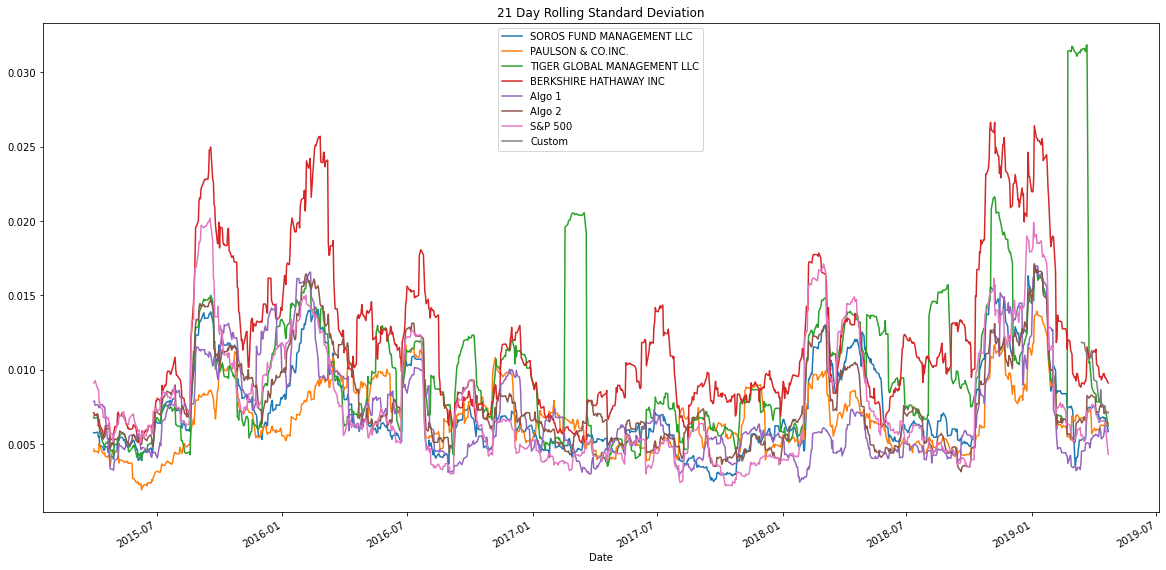

In [317]:
rolling_std_dev.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [ ]:
#Calculate and plot the correlation

In [318]:
df= all_portfolios.corr()

In [320]:
df.style.background_gradient(cmap="bwr")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.011460
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.132504
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,-0.061838
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.135588
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.008606
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,-0.009870
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,-0.195486
Custom,0.011460,0.132504,-0.061838,0.135588,0.008606,-0.009870,-0.195486,1.000000


In [ ]:
#Calculate and plot Beta

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

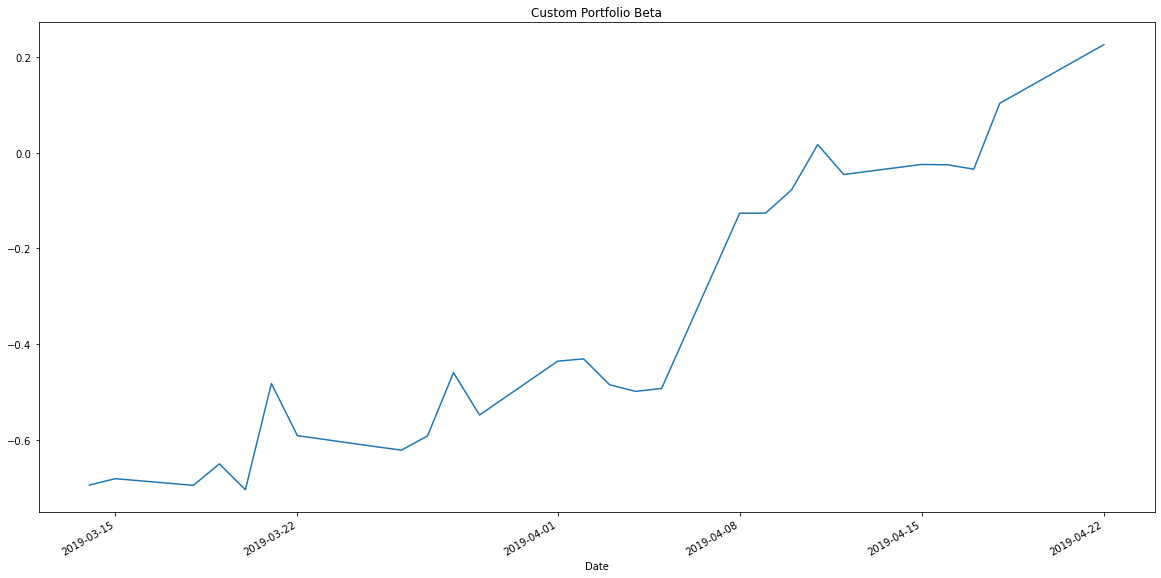

In [326]:
covariance = all_portfolios["Custom"].rolling(window=21).cov(all_portfolios)["S&P 500"]
variance = all_portfolios["S&P 500"].rolling(21).var()
beta = covariance / variance
beta.plot(figsize=(20, 10), title="Custom Portfolio Beta")

In [ ]:
# Calculate Annualized Sharpe Ratios

In [328]:
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))

In [329]:
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
Custom                        -1.555737
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

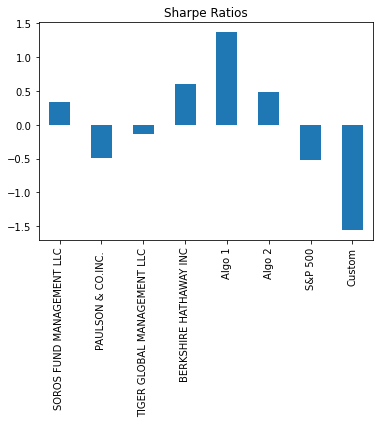

In [331]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
# ANSWER: As suspected, the custom portfolio of two commodity stocks show a negative sharpe ratio, indicating a negative return over time. The portfolio does not rank well among the others.